In [1]:
import pandas as pd
import mysql.connector
import sqlalchemy as db
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## #1 import semua table di database world

In [2]:
con = mysql.connector.connect(
    host='localhost',
    user='Darus',
    passwd='admin', database='world'
)
cur=con.cursor()
cur.execute('select * from city')
res=cur.fetchall()
city_df=pd.DataFrame(res,columns=cur.column_names)
city_df

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [3]:
cur.execute('select * from country')
res=cur.fetchall()
country_df=pd.DataFrame(res,columns=cur.column_names)
country_df

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,Ali Abdallah Salih,1780.0,YE
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,Vojislav KoÂštunica,1792.0,YU
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,Thabo Mbeki,716.0,ZA
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,Frederick Chiluba,3162.0,ZM


In [4]:
cur.execute('select * from countrylanguage')
res=cur.fetchall()
CL_df=pd.DataFrame(res,columns=cur.column_names)
CL_df

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
...,...,...,...,...
979,ZMB,Tongan,F,11.0
980,ZWE,English,T,2.2
981,ZWE,Ndebele,F,16.2
982,ZWE,Nyanja,F,2.2


In [5]:
country_df.dropna(inplace=True)

In [6]:
country_df[['Name','Continent','Region','IndepYear','Population']].sort_values('Population',ascending=True).head(10)

,Name,Continent,Region,IndepYear,Population
123,Liechtenstein,Europe,Western Europe,1806.0,32300
13,Antigua and Barbuda,North America,Caribbean,1981.0,68000
58,Dominica,North America,Caribbean,1978.0,71000
202,Seychelles,Africa,Eastern Africa,1976.0,77000
212,Tonga,Oceania,Polynesia,1970.0,99000
233,Samoa,Oceania,Polynesia,1962.0,180000
231,Vanuatu,Oceania,Melanesia,1980.0,190000
27,Belize,North America,Central America,1981.0,241000
31,Barbados,North America,Caribbean,1966.0,270000
104,Iceland,Europe,Nordic Countries,1944.0,279000


In [7]:
city_df.groupby('CountryCode')['Population'].describe()[['mean']].sort_values('mean', ascending=False).head(10)

,mean
CountryCode,
SGP,4017733.0
HKG,1650316.5
URY,1236000.0
GIN,1090610.0
UGA,890800.0
SLE,850000.0
LBR,850000.0
MLI,809552.0
AUS,808119.0


In [8]:
CL_df.groupby('Language')['Language'].describe()[['count']].sort_values('count',ascending=False).head(10)

,count
Language,
English,60
Arabic,33
Spanish,28
French,25
Chinese,19
German,19
Russian,17
Italian,15
Creole English,14


## #2 buat pie chart populasi dari setiap benua

In [9]:
cc=country_df.groupby('Continent')

In [10]:
continentlist=list(cc.groups.keys())
continentlist

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [11]:
population={}
for i in continentlist:
    population.update({i:[cc.get_group(i)['Population'].sum()]})
population=pd.DataFrame(population).T

([<matplotlib.patches.Wedge at 0x1b4e5f6fcd0>,
 [Text(1.0162026601076186, 0.4211082445051389, 'Africa'),
  Text(-0.998338605669425, 0.4618658121468058, 'Asia'),
  Text(0.3172093754840755, -1.0532702464728618, 'Europe'),
  Text(0.8750221373380974, -0.6665855227712856, 'North America'),
  Text(1.0206055708321298, -0.4103221524441775, 'Oceania'),
  Text(1.081559867562341, -0.20056982045794328, 'South America')],
 [Text(0.554292360058701, 0.22969540609371208, '13%'),
  Text(-0.5445483303651408, 0.2519268066255304, '61%'),
  Text(0.17302329571858663, -0.5745110435306519, '12%'),
  Text(0.4772848021844167, -0.36359210332979214, ' 8%'),
  Text(0.5566939477266162, -0.22381208315136952, ' 0%'),
  Text(0.589941745943095, -0.10940172024978723, ' 6%')])

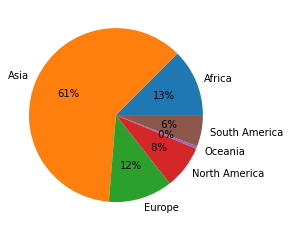

In [12]:
plt.pie(population[0], labels=continentlist, autopct='%2.f%%')

## Jawaban nomer 2
1. Berdasarkan pie chart di atas, penyumbang populasi terbesar di Dunia adalah asia dengan prosentasi 61% dari populasi Dunia
2. prosentasi populasi manusia di benua amerika utara adalah 8% dari populasi Dunia

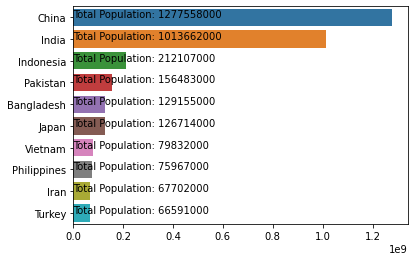

In [13]:
popur=cc.get_group('Asia')[['Name','Population']].sort_values('Population',ascending=False).head(10)
lpop=list(popur['Name'])
sns.barplot(list(popur['Population']),lpop)
for i in popur['Name']:
    plt.text(0,lpop.index(i),f"Total Population: {popur[['Name','Population']].set_index('Name').loc[i][0]}")


## jawaban No 3
1. negara dengan populasi terbanyak adalah china berdasarkan data di atas china menempati tempat pertama dengan total populasi mencapai 1.277.558.000
2. berdasarkan horizontal bar plot di atas negara turkey menempati posisi 10 dengan jumlah populasi 66.591.000
3. Negara yang menempati urutan ketiga adalah Indonesia dengan jumlah populasi 212.107.000

# #4 kerjakan beberapa poin berikut:
Hitung IQR dari Angka Harapan Hidup (Life Expectancy) dari Benua Asia
Hitung Mean, Median, Standard Deviation, Upper Boundaries serta Lower Boundaries.
Lakukan Skewness Test.
Buatlah sebuah Distribution Plot dari Angka Harapan Hidup di Benua Asia. Dan tampilkan pula di dalam Distribution Plot tersebut:
Garis vertikal untuk menandakan dimanakah letak Mean, Median, Upper Boundaries
dan Lower Boundaries

Menurut Distribution Plot tersebut jawablah pertanyaan ini:
Apakah terdapat negara yang Angka Harapan Hidup-nya berada pada outliers? Jika ada, tampilkan dalam bentuk Dataframe, data dari negara tersebut.
Jika tidak ada, cukup jawab dengan 'Tidak ada.'
Berdasarkan Skewness Test yang sudah dilakukan, apakah data LifeExpectancy termasuk data normal atau skew?

## IQR angka harapan hidup di Benua Asia

In [14]:
iqrraw=cc.get_group('Asia')['LifeExpectancy'].describe()
iqrLE=iqrraw['75%']-iqrraw['25%']
iqrLE

9.650000000000006

## Mean, Median, Standard Deviation, upper boundaries, lower bounderies dari Life Expectancy Negara2 Benua Asia

In [15]:
meanLE=cc.get_group('Asia')['LifeExpectancy'].sum()/len(cc.get_group('Asia')['LifeExpectancy'])
print(f'mean dari life expectancy benua Asia adalah {meanLE}')

mean dari life expectancy benua Asia adalah 67.80697674418606


In [29]:
pjgdata=round(len(cc.get_group('Asia')['LifeExpectancy'].sort_values())/2)
medianLE=list(cc.get_group('Asia')['LifeExpectancy'].sort_values())[pjgdata-1:pjgdata]
print(f'median dari life expectancy benua Asia adalah {medianLE[0]}')

median dari life expectancy benua Asia adalah 68.5


In [17]:
print(f'Standard Deviation dari life expectancy benua Asia adalah {iqrraw["std"]}')

Standard Deviation dari life expectancy benua Asia adalah 7.22931846056101


In [18]:
lbLE=iqrraw['25%']-1.5*iqrLE
print(f'lower boundaries dari life expectancy benua Asia adalah {lbLE}')
hbLE=iqrraw['75%']+1.5*iqrLE
print(f'high boundaries dari life expectancy benua Asia adalah {hbLE}')

lower boundaries dari life expectancy benua Asia adalah 48.57499999999999
high boundaries dari life expectancy benua Asia adalah 87.17500000000001


In [19]:
stats.skewtest(cc.get_group('Asia')['LifeExpectancy'])

SkewtestResult(statistic=-0.8248380519578518, pvalue=0.4094635401016644)

## Distribution Plot Life Expectancy di benua Asia

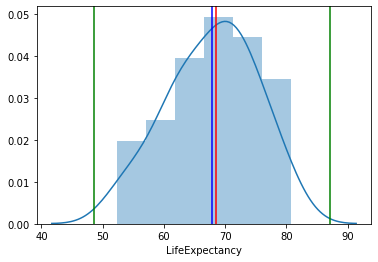

In [20]:
sns.distplot(cc.get_group('Asia')['LifeExpectancy'])
plt.axvline(meanLE,color='blue')
plt.axvline(medianLE,color='red')
plt.axvline(lbLE,color='green')
plt.axvline(hbLE,color='green')

### jawaban no.4
1. tidak ada negara yang angka harapan hidupnya berada pada outliers terlihat dari distribution plot di atas tidak ada data yang melewati garis hijau yang mana menandakan low boundaries dan high boundaries
2. dari skewtest yang dilakukan di atas terdapat hasil p.value=0.4 yang berarti nilai tersebut berada di antara -0.5 dan 0.5 yang berarti distribusi kurang lebih simetris

## #5.Data GNP (Gross National Product) pada Dataframe country saat ini, masih dalam satuan "million USD". Sehingga, jika Anda menemukan negara dengan GNP 10, maka value GNP sesungguhnya dari negara tersebut adalah 10,000,000 USD. Mengetahui hal itu maka, selesaikan tugas berikut:

In [21]:
country_df['GNP']=country_df['GNP']*1000000

In [22]:
def gnppercapita(data=pd.DataFrame):
   return data['GNP']/data['Population']

In [23]:
country_df['GNPperCapita']= gnppercapita(country_df)

In [24]:
country_df.head(5)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,GNPperCapita
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6.648000e+09,7984.0,Angola,Republic,JosÃ© Eduardo dos Santos,56.0,AO,516.229228
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3.205000e+09,2500.0,ShqipÃ«ria,Republic,Rexhep Mejdani,34.0,AL,942.314477
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,3.796600e+10,36846.0,Al-Imarat al-Â´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE,15553.461696
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,3.402380e+11,323310.0,Argentina,Federal Republic,Fernando de la RÃºa,69.0,AR,9187.675524
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1.813000e+09,1627.0,Hajastan,Republic,Robert KotÂšarjan,126.0,AM,515.056818


## #6.Saya memiliki asumsi bahwa negara-negara dengan LifeExpectancy yang tinggi akan selalu memiliki GNPperCapita yang tinggi pula. Dan ini berarti LifeExpectancy dan GNPperCapita memiliki korelasi positif yang signifikan. Apakah Anda setuju dengan asumsi saya?

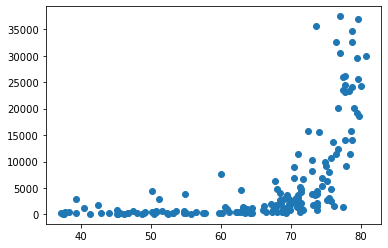

In [25]:
plt.scatter(country_df['LifeExpectancy'],country_df['GNPperCapita'])

<BarContainer object of 167 artists>

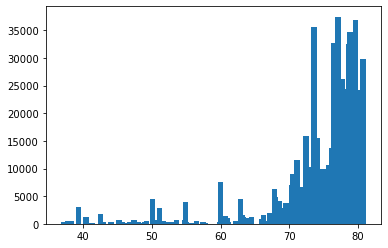

In [26]:
plt.bar(country_df['LifeExpectancy'], country_df['GNPperCapita'])

### Kesimpulan
Berdasarkan 2 plot di atas terlihat bahwa semakin tinggi life expectancy (angka harapan hidup) semakin tinggi pula GDP per kapita (GNP per Capita) sehingga saya setuju bahwa ada kecenderungan GDP per kapita (GNP per capita) yang tinggi mempengaruhi angka harapan hidup

In [27]:
LifeExpectancy={}
for i in continentlist:
    LifeExpectancy.update({i:[cc.get_group(i)['LifeExpectancy'].sum()]})
LifeExpectancy=pd.DataFrame(LifeExpectancy).T

In [28]:
LifeExpectancy.sort_values(0,ascending=False)

,0
Asia,2915.7
Europe,2693.8
Africa,2518.7
North America,1354.5
South America,846.2
Oceania,557.6
